In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import models, layers
from keras.applications import resnet50
from keras.models import Model
from keras.layers import Input
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [3]:
for dirname, _, filenames in os.walk('./data'):
    print(dirname)

./data
./data\cell_images
./data\cell_images\Parasitized
./data\cell_images\Uninfected
./data\Parasitized
./data\Uninfected


In [4]:
def data_prep(parasitized, uninfected):
    
    parasitized = ["./data/Parasitized" + '/' +  parasitize for parasitize in parasitized]
    uninfected = ["./data/Uninfected" + '/' +  uninfect for uninfect in uninfected]

    labels = len(parasitized) * ['parasitized'] + len(uninfected) * ['uninfected']
    data = parasitized + uninfected

    return pd.DataFrame({'Image_Path': data , 'Labels': labels})

In [5]:
df = data_prep(os.listdir("./data/Parasitized/"), os.listdir("./data/Uninfected/"))

In [6]:
print("Shape of the DataFrame:", df.shape)
print("\nHead of the DataFrame:")
print(df.head())
print("\nTail of the DataFrame:")
print(df.tail())

Shape of the DataFrame: (27558, 2)

Head of the DataFrame:
                                          Image_Path       Labels
0  ./data/Parasitized/C100P61ThinF_IMG_20150918_1...  parasitized
1  ./data/Parasitized/C100P61ThinF_IMG_20150918_1...  parasitized
2  ./data/Parasitized/C100P61ThinF_IMG_20150918_1...  parasitized
3  ./data/Parasitized/C100P61ThinF_IMG_20150918_1...  parasitized
4  ./data/Parasitized/C100P61ThinF_IMG_20150918_1...  parasitized

Tail of the DataFrame:
                                              Image_Path      Labels
27553  ./data/Uninfected/C99P60ThinF_IMG_20150918_142...  uninfected
27554  ./data/Uninfected/C99P60ThinF_IMG_20150918_142...  uninfected
27555  ./data/Uninfected/C99P60ThinF_IMG_20150918_142...  uninfected
27556  ./data/Uninfected/C99P60ThinF_IMG_20150918_142...  uninfected
27557  ./data/Uninfected/C99P60ThinF_IMG_20150918_142...  uninfected


In [7]:

# Function to load and preprocess images
def load_images(file_paths, target_size=(64, 64)):
    images = []
    for path in file_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, target_size)
        images.append(img)
    return np.array(images)

# Load and preprocess images
X = load_images(df['Image_Path'])
y = df['Labels']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an improved CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the improved CNN model
history = model.fit(X_train, (y_train == 'parasitized').astype(int), epochs=30, batch_size=32, validation_split=0.2)
print(history)



Epoch 1/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.6154 - loss: 0.7537 - val_accuracy: 0.9460 - val_loss: 0.1651
Epoch 2/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9270 - loss: 0.2168 - val_accuracy: 0.9476 - val_loss: 0.1612
Epoch 3/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - accuracy: 0.9464 - loss: 0.1695 - val_accuracy: 0.9596 - val_loss: 0.1585
Epoch 4/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 38s 69ms/step - accuracy: 0.9508 - loss: 0.1565 - val_accuracy: 0.9571 - val_loss: 0.1591
Epoch 5/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.9502 - loss: 0.1532 - val_accuracy: 0.9624 - val_loss: 0.1349
Epoch 6/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - accuracy: 0.9557 - loss: 0.1418 - val_accuracy: 0.9558 - val_loss: 0.1507
Epoch 7/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 37s 67ms/step - accuracy: 0.9583 - loss: 0.1231 - val_accuracy: 0.9605 - val_loss: 0.1178
Epoch 8/30
552/552 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.9618 - loss: 0.1226 - 

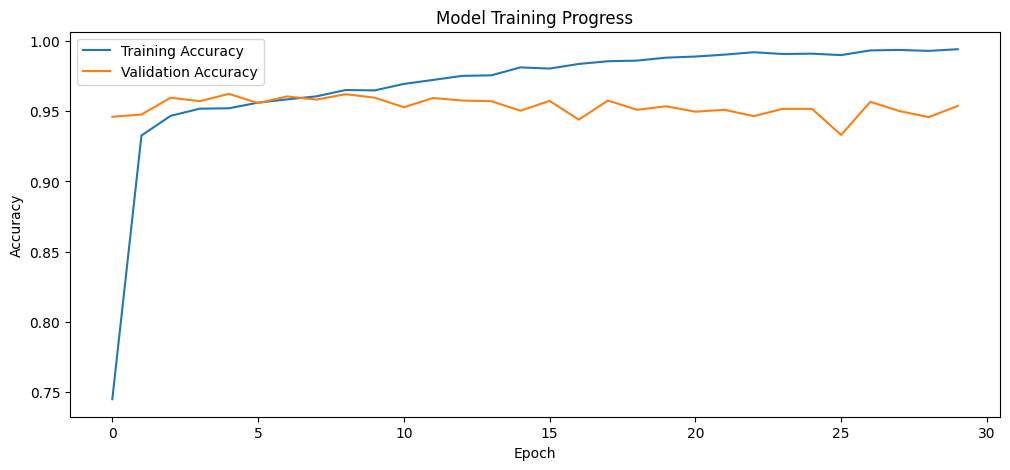

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Extract features from the CNN model
cnn_features_train = model.predict(X_train)
cnn_features_test = model.predict(X_test)

# Reshape features for KNN
cnn_features_train = cnn_features_train.reshape(
    cnn_features_train.shape[0], -1)
cnn_features_test = cnn_features_test.reshape(cnn_features_test.shape[0], -1)


689/689 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step


In [11]:
# Build a KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(cnn_features_train, (y_train == 'parasitized'))

# Predict using the hybrid model
knn_predictions = knn_model.predict(cnn_features_test)
y_pred = knn_model.predict(cnn_features_test)

# Evaluate the hybrid model
accuracy = accuracy_score((y_test == 'parasitized'), knn_predictions)
print()
print(f"Accuracy of the hybrid model: {accuracy*100}")


# Calculate evaluation metrics
accuracy = accuracy_score((y_test == 'parasitized'), y_pred)
f1 = f1_score((y_test == 'parasitized'), y_pred)
precision = precision_score((y_test == 'parasitized'), y_pred)
conf_matrix = confusion_matrix((y_test == 'parasitized'), y_pred)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Specificity:", specificity)
print("Confusion Matrix:")
print(conf_matrix)




Accuracy of the hybrid model: 95.04716981132076
Accuracy: 0.9504716981132075
F1 Score: 0.9507131251128362
Precision: 0.9602479941648432
Specificity: 0.959852670349908
Confusion Matrix:
[[2606  109]
 [ 164 2633]]


In [12]:
# Save models
if not os.path.exists('cnn-knn-models'):
    os.makedirs('cnn-knn-models')

# Save KNN model
import joblib
joblib.dump(knn_model, 'cnn-knn-models/knn_model.joblib')


['cnn-knn-models/knn_model.joblib']

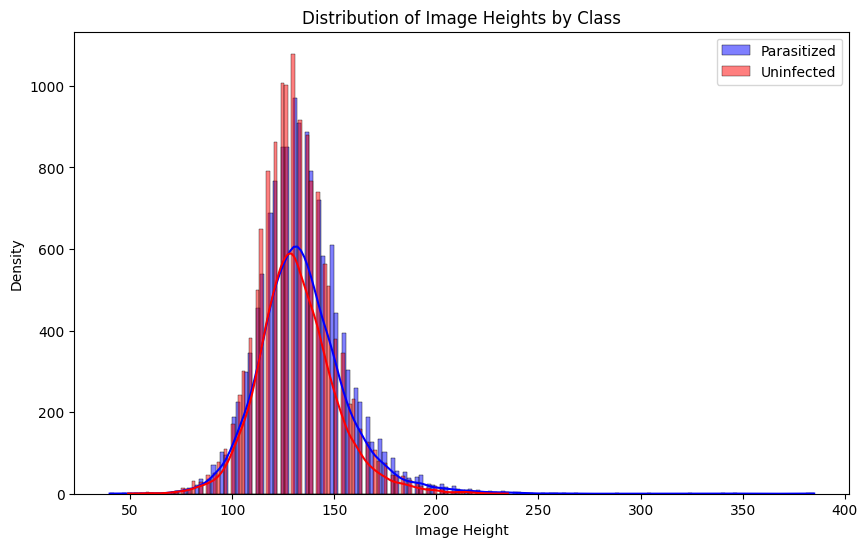

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Labels'] == 'parasitized']['Image_Path'].apply(
    lambda x: cv2.imread(x).shape[0]), color='blue', label='Parasitized', kde=True)
sns.histplot(df[df['Labels'] == 'uninfected']['Image_Path'].apply(
    lambda x: cv2.imread(x).shape[0]), color='red', label='Uninfected', kde=True)
plt.title('Distribution of Image Heights by Class')
plt.xlabel('Image Height')
plt.ylabel('Density')
plt.legend()
plt.show()


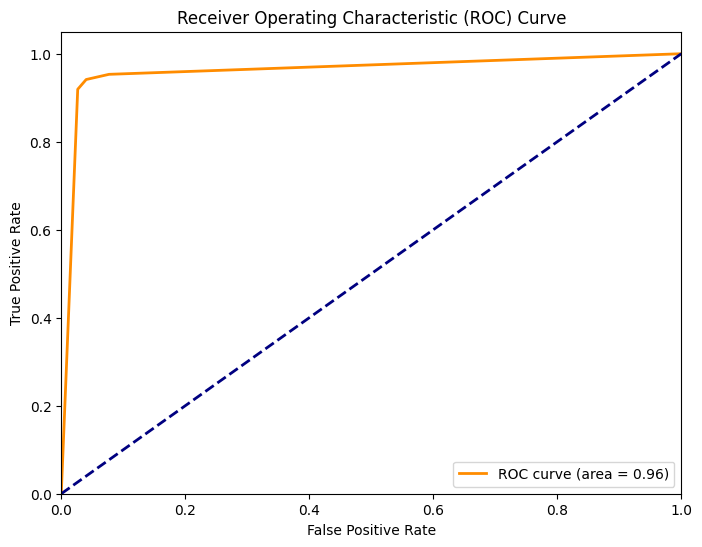

In [14]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(
    (y_test == 'parasitized'), knn_model.predict_proba(cnn_features_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


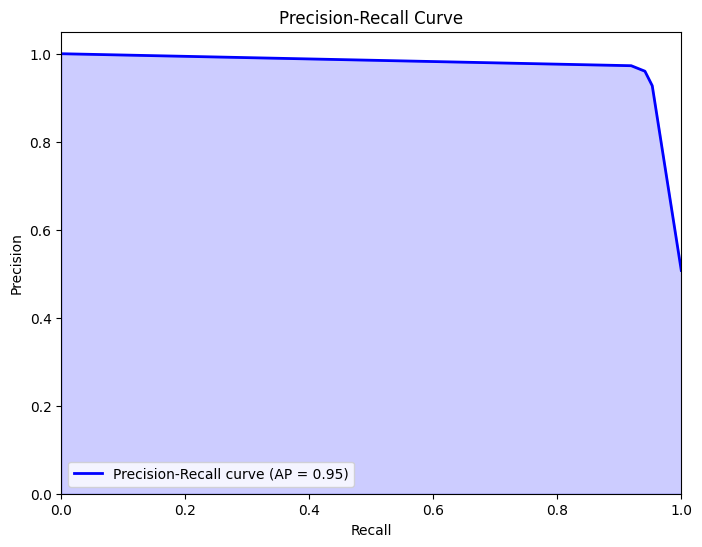

In [15]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(
    (y_test == 'parasitized'), knn_model.predict_proba(cnn_features_test)[:, 1])
average_precision = average_precision_score(
    (y_test == 'parasitized'), knn_model.predict_proba(cnn_features_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2,
         label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
